In [15]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt

import sentencepiece
from ray.util.multiprocessing import Pool


DATASET = "../../dataset_processed/sharegpt_gpt4.json"
TOKENIZER = "../../tokenizer/llama_tokenizer.model"

In [2]:
# Load dataset
tokenizer = sentencepiece.SentencePieceProcessor(model_file=TOKENIZER)
with open(DATASET, "r") as f:
    dataset = json.load(f)

# Parallel tokenization
def _tokenize(sample):
    for c in sample["items"]:
        c["value"] = tokenizer.tokenize(c["value"])

    return sample

dataset_tokenized = Pool().map(_tokenize, dataset)

2023-05-24 20:04:38,940	INFO worker.py:1625 -- Started a local Ray instance.


In [20]:
PROMPT_LEN = {
    "human": 4,
    "gpt": 5
}

dataset_len = np.array([sum(len(c["value"]) + PROMPT_LEN[c["from"]] for c in sample["items"]) for sample in dataset_tokenized])

(array([4650.,  896.,  301.,  154.,   71.,   33.,   33.,   17.,   10.,
          10.]),
 array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000., 50000.]),
 <BarContainer object of 10 artists>)

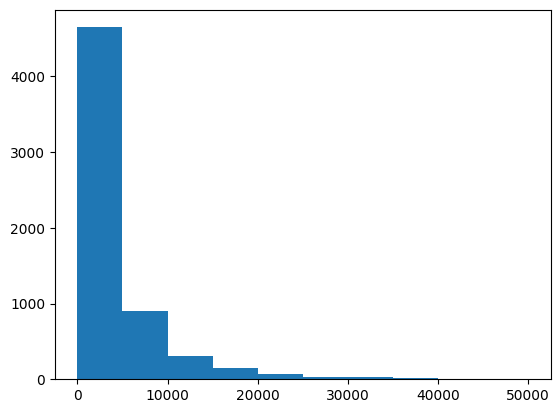

In [19]:
plt.hist(dataset_len, range=(0, 50000))

In [21]:
np.sum(dataset_len < 8192)

5334